# Session 18: Assignment 1 - Raghunath

### In this assignment students will build the randomn forest model after normalizing the variable to housing pricing from boston dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_data = pd.DataFrame(boston.data)

In [5]:
print("Shape: {0}".format(boston_data.shape))
print("Keys: {0}".format(boston.keys()))

Shape: (506, 13)
Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
boston_data.columns= boston.feature_names

In [7]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X = boston_data.copy()
Y = boston.target

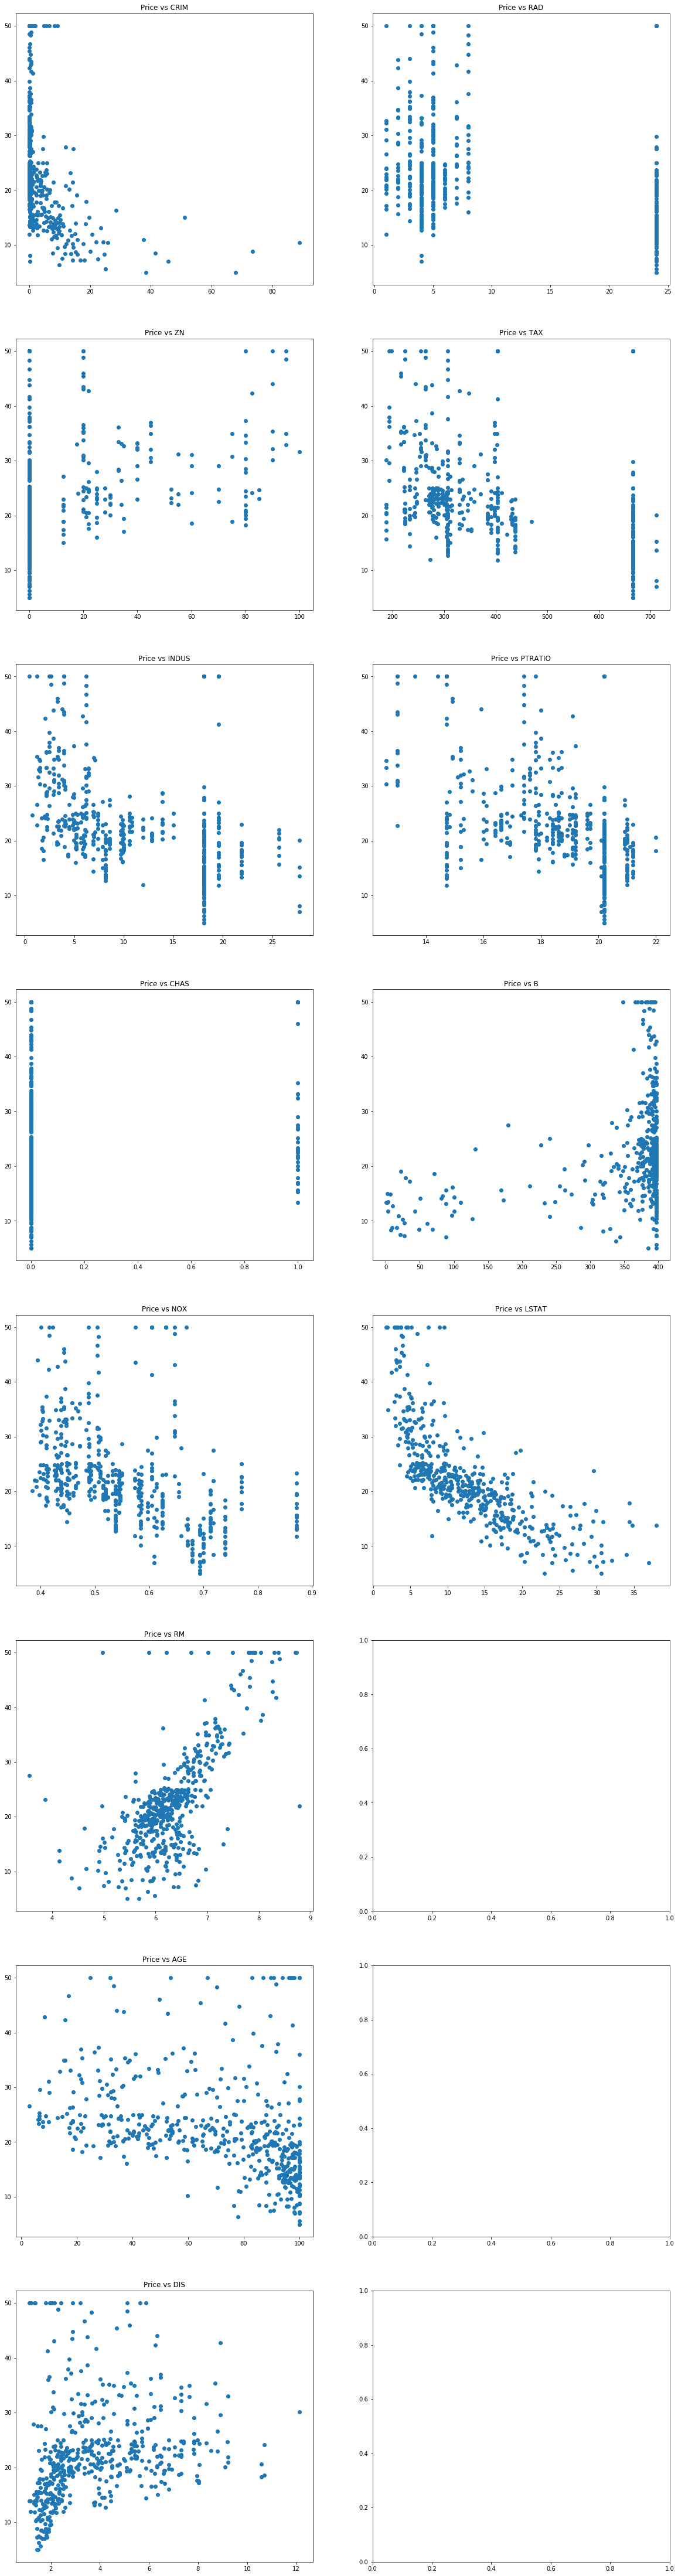

In [9]:
fig, axes = plt.subplots(8, 2, figsize=(20,80))
i = 0
j = 0
for col in boston_data.columns:
    #axes[i][j].scatter(Y, bos[col])
    axes[i][j].scatter(boston_data[col],Y)
    axes[i][j].set_title("Price vs {0}".format(col))
 
    #print("i : {}".format(i))
    #print("j : {}".format(j))   
    #print("-----------------")
    i+=1
    if i>7:
        j+=1
        i=0
    if(j>2):
        j=0

In [10]:
scaled_X = StandardScaler().fit_transform(X)
scaled_Y = StandardScaler()

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [12]:
#Random Forest

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
acc_RF = random_forest.score(X_train, Y_train)
acc_RF

0.974317663179466

In [14]:
acc_RF_test = random_forest.score(X_test, Y_test)
acc_RF_test

0.890600965975491